# Journey data
link: https://cycling.data.tfl.gov.uk

In [70]:
import pandas as pd
import requests
import io
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### import journey cycle data per year

In [58]:
# can't scrape the data with selenium and bs4 -> copy pasted names of the files in a seperate csv

# read the list of file names
filenames = pd.read_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/filenames-data.csv', header=None, squeeze=True).tolist()

# combine base-url and filenames
base_url = 'http://cycling.data.tfl.gov.uk/usage-stats/'
url_list = [base_url + urllib.parse.quote(x) for x in filenames]

# dataframe per year
dataframes_by_year = {}

# loop over the urls and extract the data
for url in url_list:

    
    # check for format and download the data and create a dataframe
    if (url[-3:] == "csv"):
        response = requests.get(url)
        temp_df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

        filename = url.split('/')[-1]
        year = int(filename[-6:-4]) + 2000
    
    elif (url[-4:] == "xlsx"):
        response = requests.get(url).content
        temp_df = pd.read_excel(io.BytesIO(response))

        filename = url.split('/')[-1]
        year = int(filename[-7:-5]) + 2000
    
    
    # if the year is not already a key in the dictionary, add it with an empty dataframe
    if year not in dataframes_by_year:
        dataframes_by_year[year] = pd.DataFrame()
    
    # add the new data to the appropriate dataframe in the dictionary
    dataframes_by_year[year] = pd.concat([dataframes_by_year[year], temp_df], ignore_index=True)
    


/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
df_2015 = dataframes_by_year[2015]
df_2016 = dataframes_by_year[2016]
df_2017 = dataframes_by_year[2017]
df_2018 = dataframes_by_year[2018]
df_2019 = dataframes_by_year[2019]
df_2020 = dataframes_by_year[2020]
df_2021 = dataframes_by_year[2021]
df_2022 = dataframes_by_year[2022]

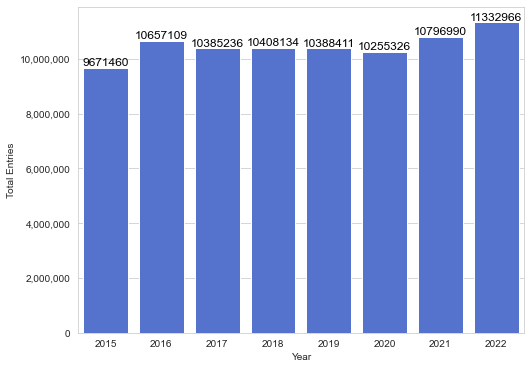

In [78]:
# plot length of all dataframes

length_of_dfs = [len(df_2015), len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022)]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

sns.set_style("whitegrid")
sns.set_palette("Blues")

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=years, y=length_of_dfs, ax=ax, color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Entries")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f"{int(p.get_height())}", 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [80]:
# total amount of entries: 83'895'632
sum(length_of_dfs)

83895632

### clean data

In [ ]:
## Clean data - NAs, and start/end being the same station, drop additional useless columns

print(all_data.shape)

all_data.dropna(axis=0, subset=["StartStation Id", "EndStation Id", "Start Date", "End Date"], inplace=True)

print(all_data.shape)

all_data["EndStation Id"] = all_data["EndStation Id"].astype(int)
all_data["StartStation Id"] = all_data["StartStation Id"].astype(int)

all_data = all_data[all_data["StartStation Id"] != all_data["EndStation Id"]]

all_data = all_data.loc[:,('Start Date',
                           'StartStation Id',
                           'End Date',
                           'EndStation Id',
                           'Duration')]
                           
print(all_data.shape)

## Extra drop for duplicates

all_data.drop_duplicates(inplace=True)
print(all_data.shape)

all_data.head()

### save data as csv

In [84]:
df_2015.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2015.csv')
df_2016.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2016.csv')
df_2017.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2017.csv')
df_2018.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2018.csv')
df_2019.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2019.csv')
df_2020.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2020.csv')
df_2021.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2021.csv')
df_2022.to_csv('/Users/tabea/Documents/UrbanMobility/data/cycling-data-tfl/journey_data_2022.csv')